# Demo

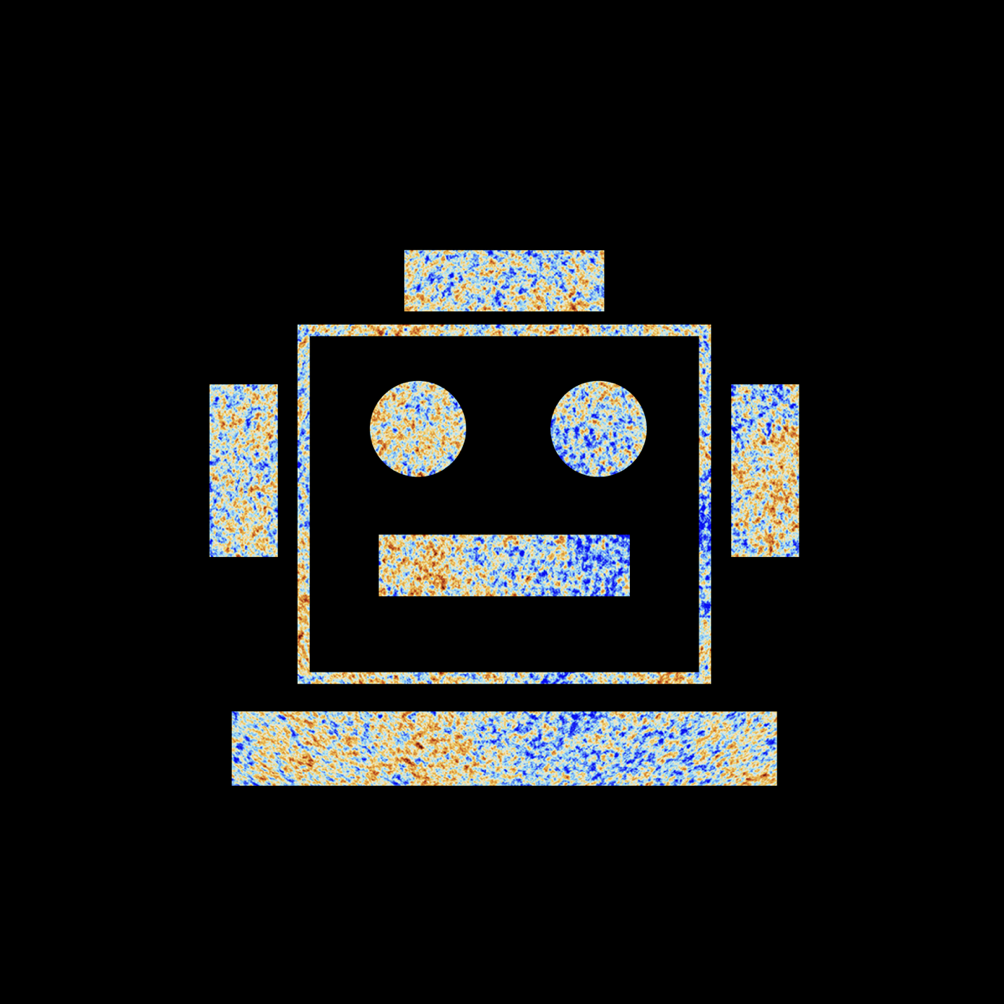


   ___   _____________  ____  ___  ______   ____  ______
  / _ | / __/_  __/ _ \/ __ \/ _ \/  _/ /  / __ \/_  __/
 / __ |_\ \  / / / , _/ /_/ / ___// // /__/ /_/ / / /   
/_/ |_/___/ /_/ /_/|_|\____/_/  /___/____/\____/ /_/       



In [1]:
import os
import re

os.environ["CMBAGENT_DEBUG"] = "false"
os.environ["ASTROPILOT_DISABLE_DISPLAY"] = "false"
import copy
import cmbagent

Message from _User:


Download and plot sp500 during 2008 financial crisis. 


Calling engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-11-20,engineer,0.00995,1900,520,2420


Message from engineer:




Forwarding content...



Calling engineer_response_formatter...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
o3-mini-2025-01-31,engineer_response_formatter,0.00563,1655,865,2520


Message from engineer_response_formatter:



**Code Explanation:**

The code will:
1. Download historical S&P 500 data for the year 2008 using the yfinance library.
2. Filter the data to include only the relevant time period (2008 financial crisis).
3. Plot the S&P 500 closing prices during this period.
4. Save the plot as a high-resolution PNG file in the data/ directory.

**Python Code:**

```python
# filename: codebase/plot_sp500_2008.py
import os
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime

# Ensure the output directory exists
output_dir = "data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Download S&P 500 data for the year 2008
start_date = "2008-01-01"
end_date = "2008-12-31"
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)

# Check if data is successfully downloaded
if sp500_data.empty:
    print("No data was downloaded. Please check the ticker symbol or date range.")
else:
    # Plot the closing prices during the 2008 financial crisis
    rcParams['text.usetex'] = True
    rcParams['font.family'] = 'serif'

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(sp500_data.index, sp500_data['Close'], label=r'S\&P 500 Closing Price', color='blue', linewidth=1.5)
    ax.set_title(r'S\&P 500 Closing Prices During 2008 Financial Crisis', fontsize=14)
    ax.set_xlabel(r'Date', fontsize=12)
    ax.set_ylabel(r'Closing Price (USD)', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=10)
    ax.relim()
    ax.autoscale_view()

    # Save the plot
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plot_filename = os.path.join(output_dir, "sp500_2008_crisis_" + timestamp + ".png")
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')

    # Print confirmation and details
    print("S&P 500 data for 2008 successfully downloaded and plotted.")
    print("Plot saved as:", plot_filename)
    print("Summary of downloaded data:")
    print(sp500_data.describe())
```


Calling executor...

Message from executor:

execution results:
Execution output: 
[*********************100%***********************]  1 of 1 completed
YF.download() has changed argument auto_adjust default to True
S&P 500 data for 2008 successfully downloaded and plotted.
Plot saved as: data/sp500_2008_crisis_20250505_193414.png
Summary of downloaded data:
Price         Close         High          Low         Open        Volume
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC
count    252.000000   252.000000   252.000000   252.000000  2.520000e+02
mean    1221.299167  1236.990915  1206.232066  1223.342182  5.036637e+09
std      190.757085   185.627571   195.824038   190.179695  1.475237e+09
min      752.440002   801.200012   741.020020   755.840027  1.219310e+09
25%     1145.862518  1167.780029  1113.192535  1159.750000  3.935745e+09
50%     1289.389954  1300.450012  1275.429993  1289.554993  4.738500e+09
75%     1360.950043  1369.462494  1350.277466  1362.212

Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-11-20,executor_response_formatter,0.00573,2234,14,2248


Message from executor_response_formatter:



Execution status: success. Transfer to control.

xxxxxxxxxxxxxxxxxxxxxxxxxx

Workflow status:

Plan step number: 1

Agent for sub-task (might be different from the next agent suggestion for debugging): engineer

Current status (before execution): In progress

xxxxxxxxxxxxxxxxxxxxxxxxxx




Calling control...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-11-20,control,0.00558,2071,40,2111


Message from control:



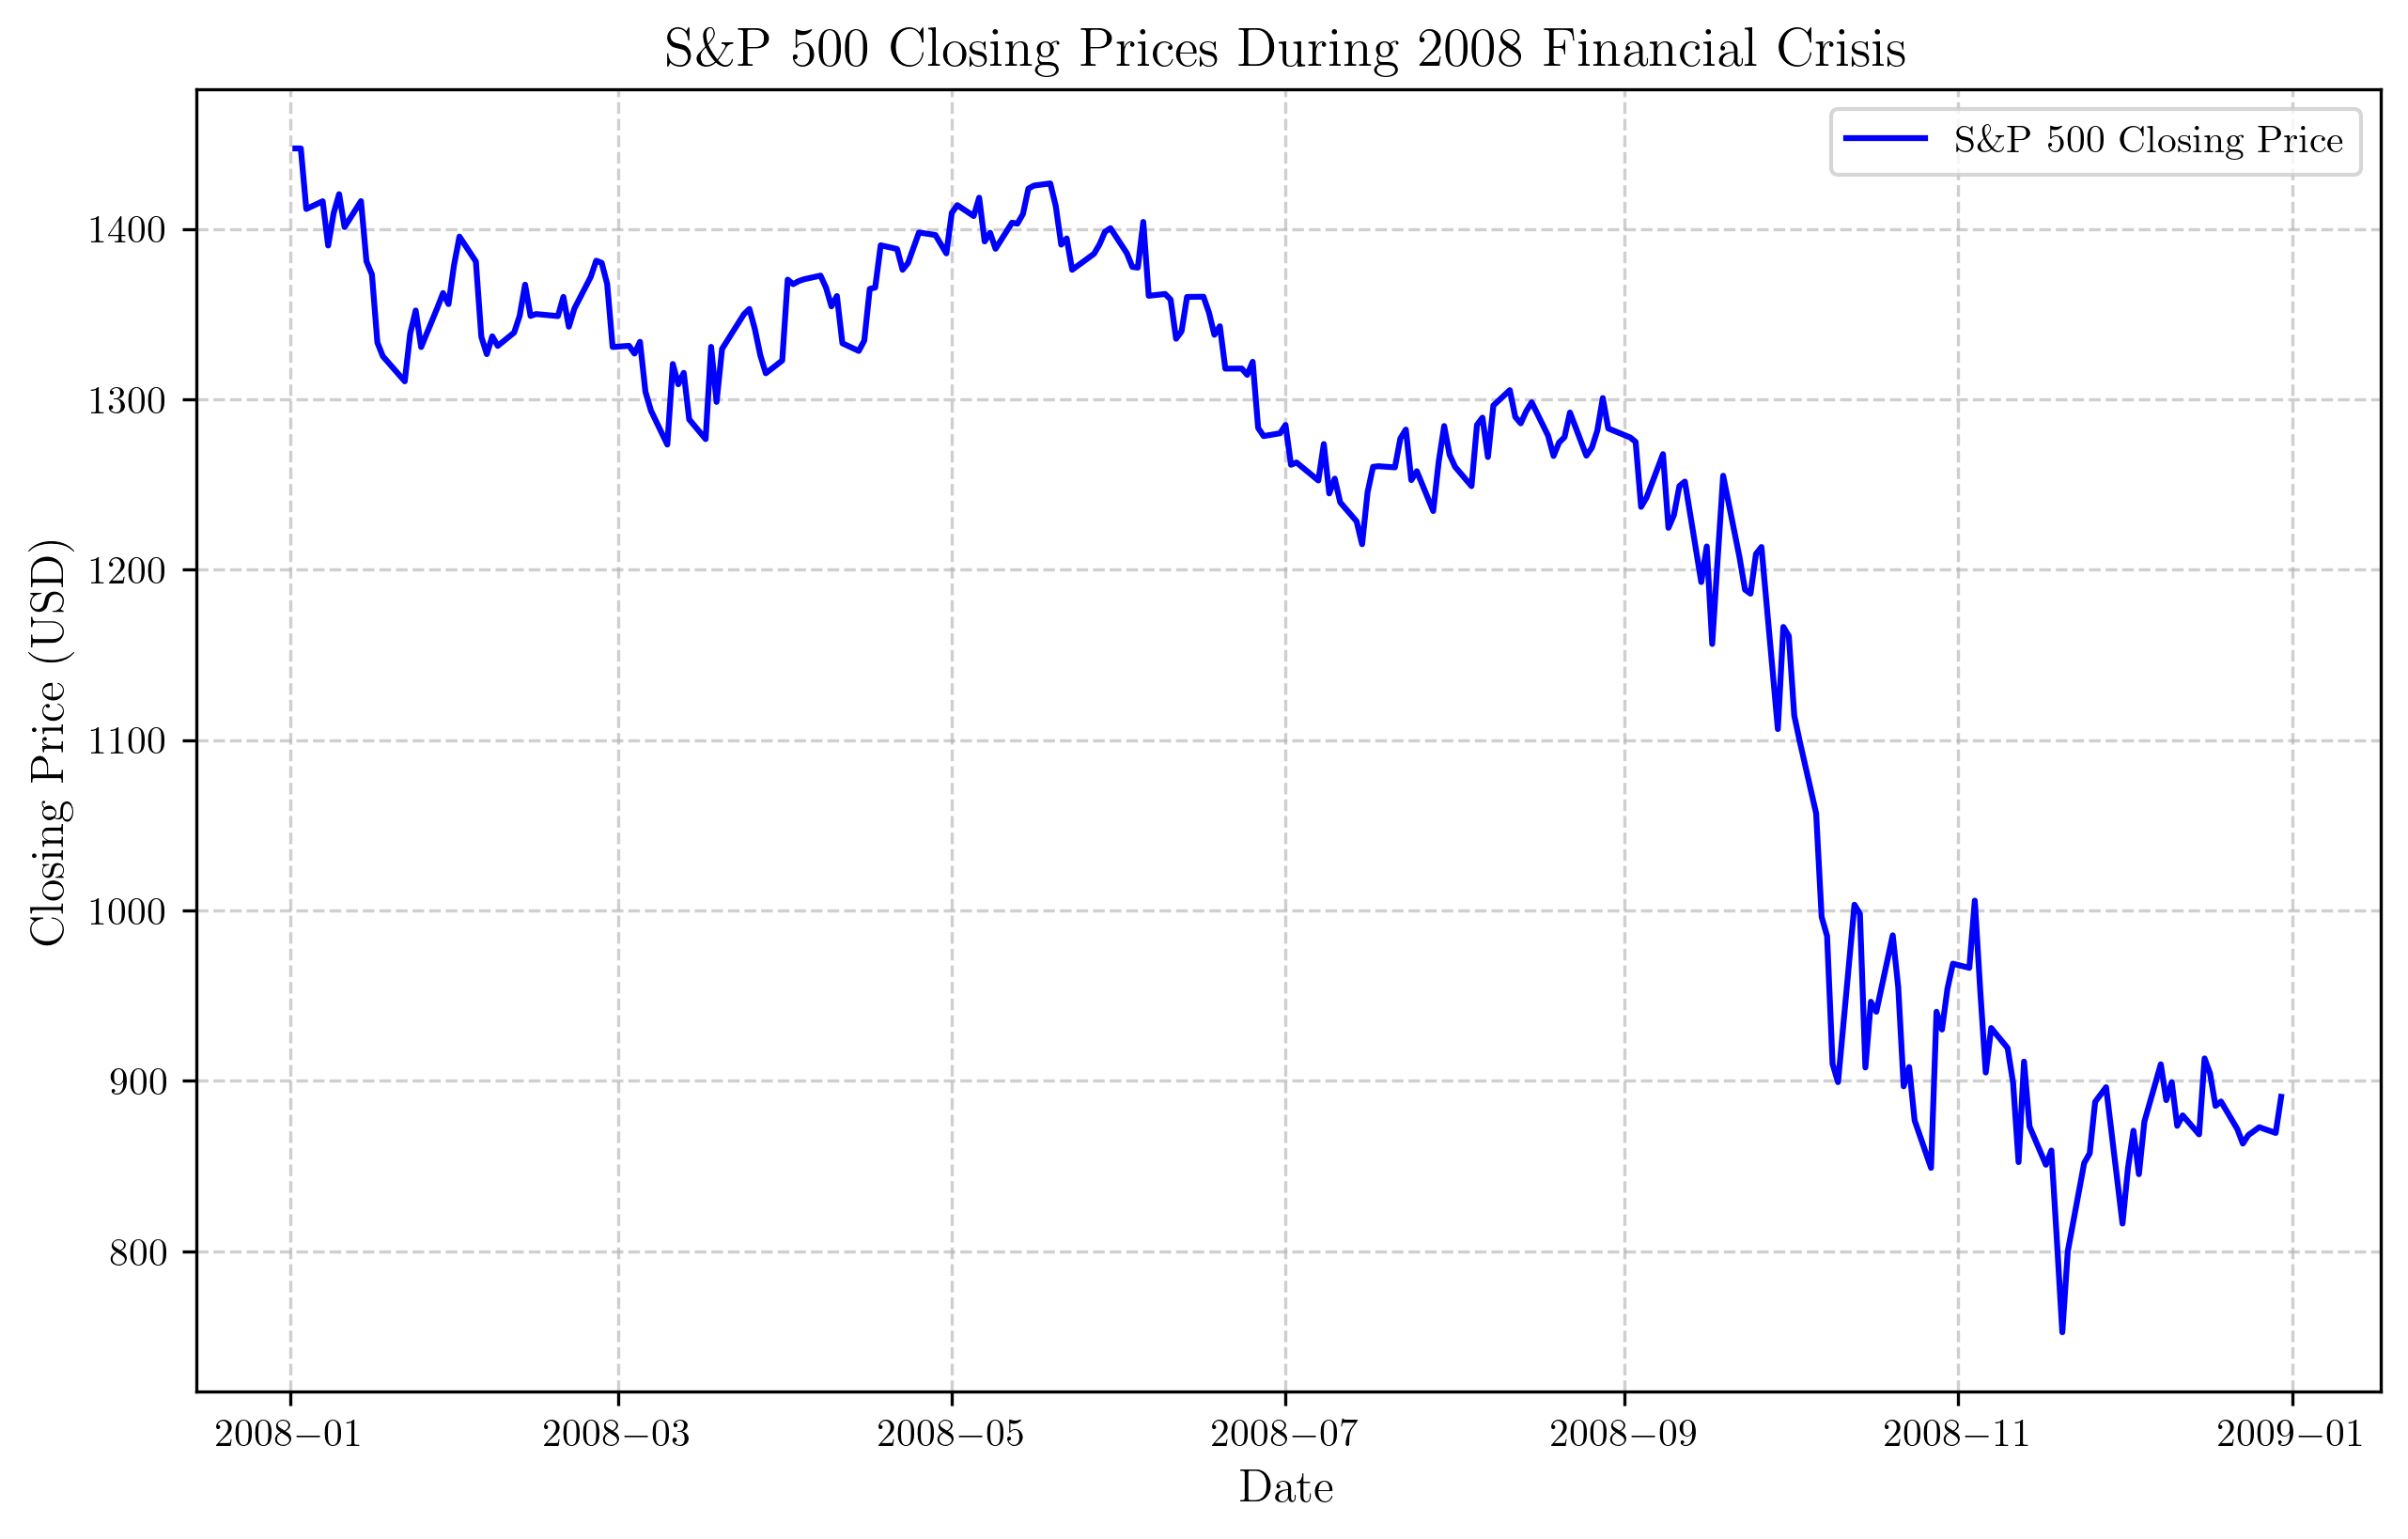


**Step number:** 1 out of 1.
 
**Sub-task:** solve the main task.
 
**Agent in charge of sub-task:** `engineer`
 
**Instructions:**
 
solve the main task.
 
**Status:** completed ✅
        


Calling admin...



Type your suggestion, or type 'exit' to end the conversation:  exit


displaying cost...
| Agent                       | Cost                 | Prompt Tokens | Completion Tokens | Total Tokens |
|-----------------------------|----------------------|---------------|-------------------|--------------|
| executor response formatter | 0.005725             | 2234.0        | 14.0              | 2248.0       |
| engineer response formatter | 0.0056265            | 1655.0        | 865.0             | 2520.0       |
| control                     | 0.005577500000000001 | 2071.0        | 40.0              | 2111.0       |
| engineer                    | 0.009949999999999999 | 1900.0        | 520.0             | 2420.0       |
| Total                       | 0.026879             | 7860.0        | 1439.0            | 9299.0       |


In [2]:


task = r"""
Download and plot sp500 during 2008 financial crisis. 
"""

results = cmbagent.human_in_the_loop(task,
                                     max_rounds=50,
                                     # initial_agent='engineer',
                                     )




In [3]:
results['final_context']['work_dir']

'/Users/boris/CMBAgents/cmbagent/cmbagent/../output'

In [4]:
def get_result(cmbagent_results):
    chat_history = cmbagent_results['chat_history']
    try:
        for obj in chat_history[::-1]:
            if obj['name'] == 'executor':
                result = obj['content']
                break
        task_result = result
    except:
        task_result = None


    # Regular expression to find a float number in the string
    match = re.search(r"[-+]?\d*\.\d+|\d+", task_result)
    if match:
        value = float(match.group())
        # print("Extracted value:", value)
    else:
        print("No numerical value found.")
    return value

In [5]:
get_result(results)

3.0